<a href="https://colab.research.google.com/github/JoeZhang1000/CSI4106-Assignment-2/blob/main/Joe_Zhang_Christian_Paravalos_CSI4106_Assignment_2_300245795_300231900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Joe Zhang <br/>
Student Number: 300245795

Name: Christian Paravalos<br/>
Student Number: 300231900

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [90]:
# We first load necessary packages
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [91]:
# We first load the dataset
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"
df = pd.read_csv(url)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [92]:
# Show data types
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


A summary of the attributes for each instance in the dataset and the target variable is as follows:

**Attributes:**
1. **Gender:** Multi-class categorical variable representing the biological sex of the individual (either 'male', 'female', or 'other').
2. **Age:** Float variable representing the age of the individual.
3. **Hypertension:** Binary categorical variable representing whether the individual has hypertension ('1' if the individual has hypertension and '0' otherwise).
4. **Heart Disease:** Binary categorical variable representing whether the individual has heart disease ('1' if the individual has heart disease and '0' otherwise).
5. **Smoking History:** Multi-class categorical variable representing the individual's smoking history. The 5 categories are as follows:
   - 'not current' (individual smoked in the past but does not currently),
   - 'never' (individual has no smoking history),
   - 'former' (individual smoked in the past but not currently),
   - 'ever' (individual has smoked in the past (at least once but does not smoke now) THIS IS AN ASSUMPTION MIGHT DELETE),
   - 'current' (individual is a current smoker),
   - 'no info' (individual's smoking history is unclear).
6. **BMI:** Float variable representing the Body Mass Index (BMI) of the individual (in kg/m^2).
7. **HbA1c Level:** Float variable representing the hemoglobin A1c level of the individual (in decimal form reprsenting a percentage from 0-100%).
8. **Blood Glucose Level:** Integer variable representing the individual's blood glucose levels (in mg/dL).

**Target Variable:**
1. **Diabetes:** Binary categorical variable representing whether the individual has diabetes ('1' if the individual has diabetes and '0' otherwise).


2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

For the categorical features, we have gender, hypertension, heart disease, and smoking history. We use bar charts to visualize their distributions.


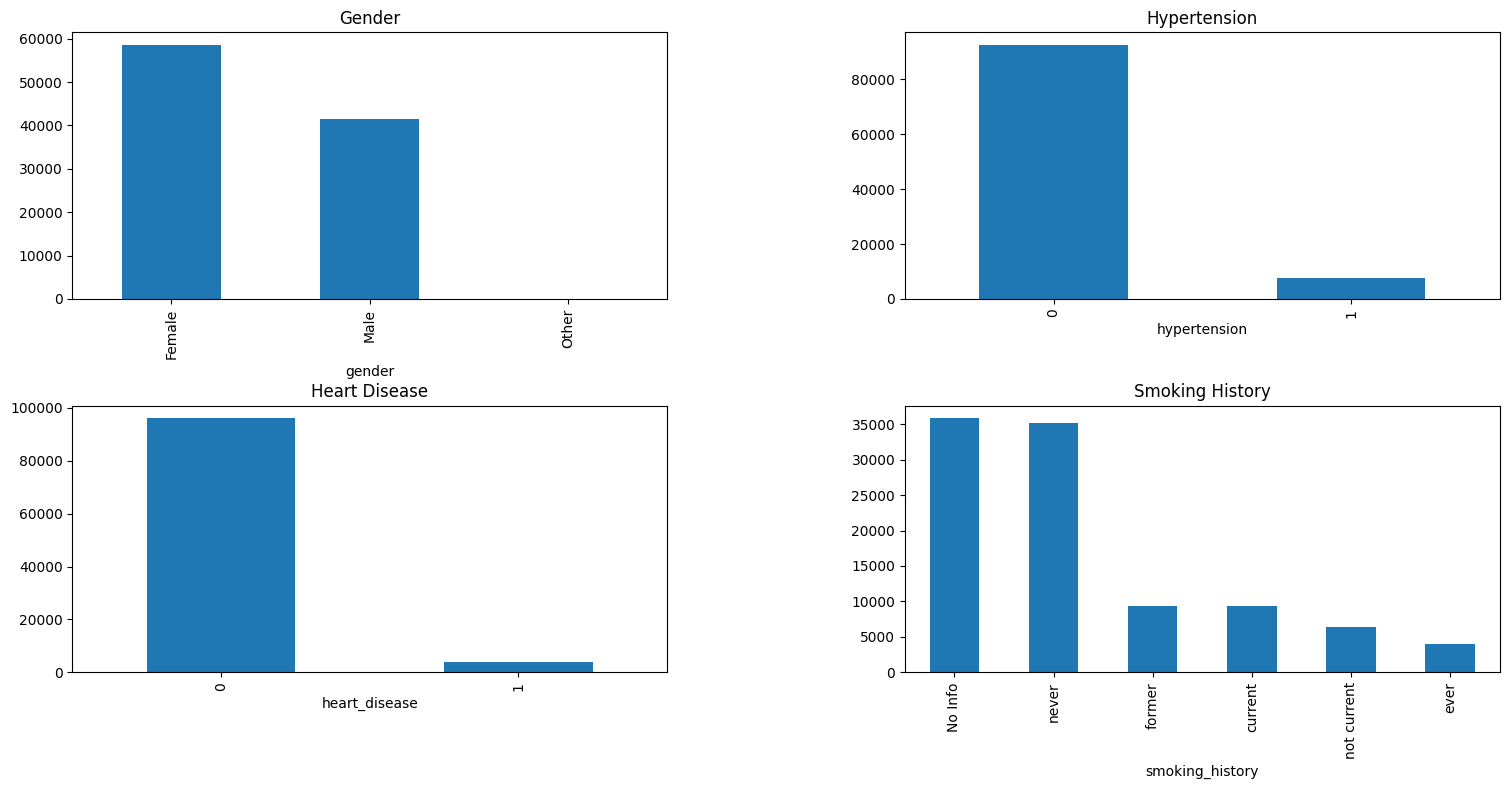

In [93]:
# Categorical Variables Plot with 2 Rows and 2 Columns
fig_cat, axes_cat = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
fig_cat.tight_layout(h_pad=2)  # Initial height padding adjustment

df['gender'].value_counts().plot(ax=axes_cat[0, 0], kind="bar")
axes_cat[0, 0].set_title("Gender")

df['hypertension'].value_counts().plot(ax=axes_cat[0, 1], kind="bar")
axes_cat[0, 1].set_title("Hypertension")

df['heart_disease'].value_counts().plot(ax=axes_cat[1, 0], kind="bar")
axes_cat[1, 0].set_title("Heart Disease")

df['smoking_history'].value_counts().plot(ax=axes_cat[1, 1], kind="bar")
axes_cat[1, 1].set_title("Smoking History")

# Adjust layout to avoid overlap
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)

plt.show()




For the feature gender, we see that there are a considerably higher amount of females than males in the sample. There's very few people that have other genders.

For the feature hyptertension, we see that most people have the value 0, while very few have the value 1. This shows that most people in the data don't have hypertension, while there are very few that do.

For the feature heart disease, we see that most people have the value 0, while very few have the value 1. This shows that most people in the data don't have heart disease, while there are very few that do.

For the feature smoking history, we see that most people either never smoke or they have no info on their smoking history. There's a few people that are current, not current, former, or ever. This shows that most people are non-smokers, with a few that either used to smoke or still smoke now.

Each feature above has some level of class imbalance, with some worse than others, like in the heart disease and hypertension features, where the positive cases are significantly underrepresented in the dataset. Thus, we should be careful when building the models to ensure we capture patterns for individuals with these feature values.



For the numerical features, we have age, BMI, HbA1c level, and blood glucose level. We use histograms and boxplots to visualize their distributions.

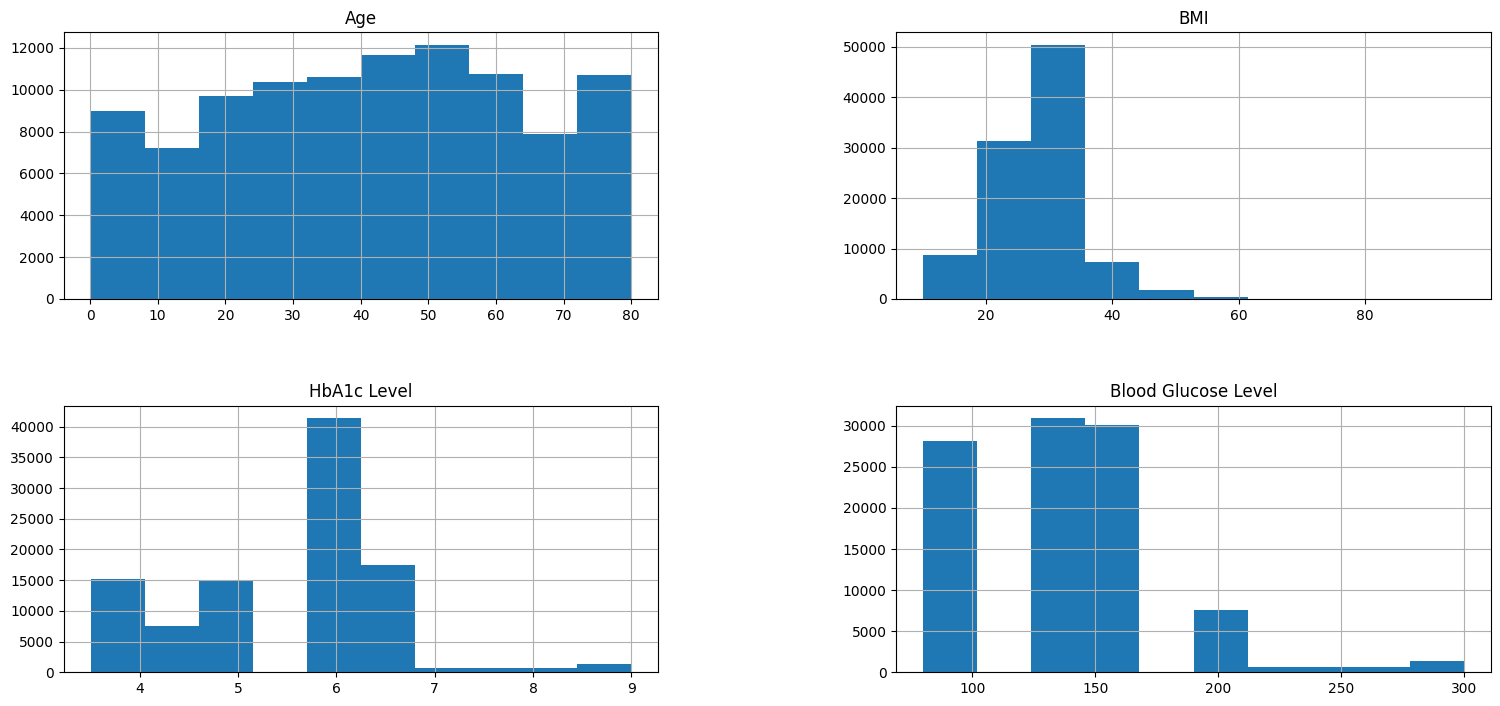

In [94]:
# Numerical Variables Plot with 2 Rows and 2 Columns
fig_num, axes_num = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
fig_num.tight_layout(h_pad=2)  # Initial height padding adjustment

df.hist(column="age", ax=axes_num[0, 0])
axes_num[0, 0].set_title("Age")

df.hist(column="bmi", ax=axes_num[0, 1])
axes_num[0, 1].set_title("BMI")

df.hist(column="HbA1c_level", ax=axes_num[1, 0])
axes_num[1, 0].set_title("HbA1c Level")

df.hist(column="blood_glucose_level", ax=axes_num[1, 1])
axes_num[1, 1].set_title("Blood Glucose Level")

# Adjust layout to avoid overlap
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)

plt.show()


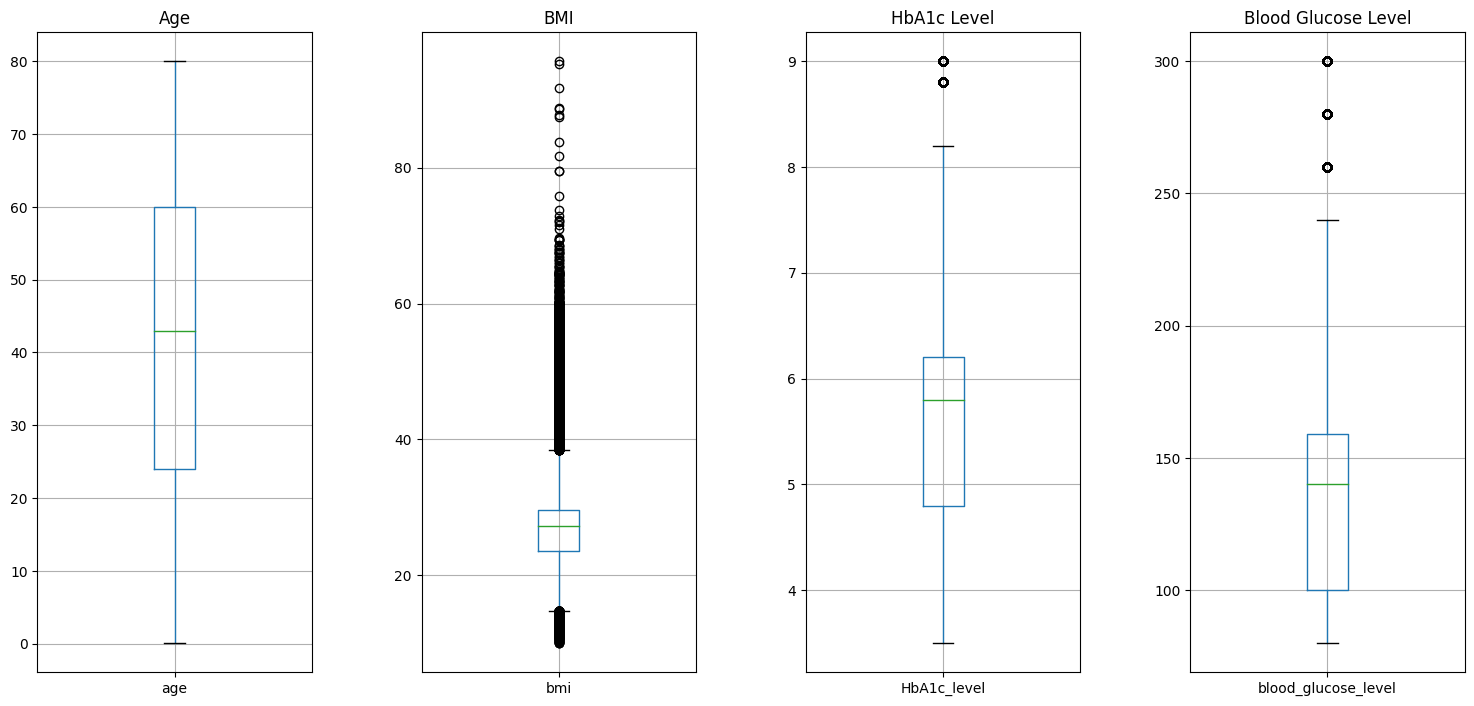

In [95]:
# Numerical Variables Plot with 2 Rows and 2 Columns
fig_num, axes_num = plt.subplots(nrows=1, ncols=4, figsize=(15, 8))
fig_num.tight_layout(h_pad=2)  # Initial height padding adjustment

df.boxplot(column="age", ax=axes_num[0,])
axes_num[0].set_title("Age")

df.boxplot(column="bmi", ax=axes_num[1])
axes_num[1].set_title("BMI")

df.boxplot(column="HbA1c_level", ax=axes_num[2])
axes_num[2].set_title("HbA1c Level")

df.boxplot(column="blood_glucose_level", ax=axes_num[3])
axes_num[3].set_title("Blood Glucose Level")

# Adjust layout to avoid overlap
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)

plt.show()

In [96]:
#Get numeric columns
numeric_columns = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

#Print number of outliers for each column based on the IQR (excluding the risk level column)
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Apply outlier condition to the specific column
    outliers = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)

    # Count the number of outliers
    num_outliers = outliers.sum()

    print(f"Outliers for '{column}': {num_outliers}")

Outliers for 'age': 0
Outliers for 'bmi': 7086
Outliers for 'HbA1c_level': 1315
Outliers for 'blood_glucose_level': 2038


For the feature age, from looking at the histogram, we have that the distribution is quite uniform from 0 to 80. There are no people with age greater than 80 in the sample. There do not seem to be any outliers as the distribution looks uniform over all age groups and also from looking at the boxplot.

For the feature BMI, from looking at the histogram, we see that most of the values are centered between 20 and 40 and is skewed to the right. From looking at the boxplot, there are a lot of outliers, both in the low end and in the high end. There are outliers with values below 10 and with values above 40. This shows that most people have normal weight or are overweight, but there are a few that are obese.

For the feature HbA1c level, we see that most values are centered around 6. There are also a considerable number that are between 1 and 5 and fewer that are greater than 7. The normal level is below 5.7 (what does this mean?). Therefore, we have some people that have normal HbA1c level, some that are a little above normal, and very few that have very high levels. From looking at the boxplot, we see that there are around 1300 individuals with HbAIc levels near and at 9.

For the feature blood glucose level, we have that most of the values are below 200. There are some that are less than 100 and some that are between 125 and 175. This shows that most people have normal or slighly above normal blood glucose level. There are some that are above 200, which shows that there are very few people that have very high levels of blood glucose. From looking at the boxplot, there are around 2000 outliers with values ranging from above 250 to below or at 300.

The outliers in these features are important to preserve since they probably indicate diabetes, such as being obese or having an abnormaly high blood glucose level.

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

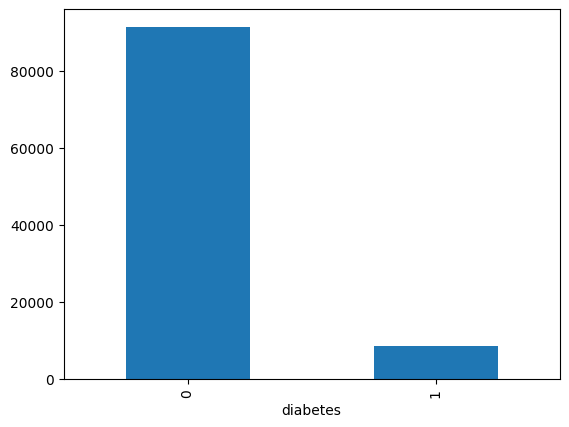

In [97]:
# We construct a bar chart that shows the distribution of the target variable
df['diabetes'].value_counts().plot(kind = "bar")
plt.show()

We see that for the target variable, or diabetes, we have that most people have the value 0, while some have the value 1. This shows that most people in the sample are not diabetic, while a few are diabetic. This shows that the classes are not balanced and accuracy is not a good measure to evaluate models. We should be careful when training our models to ensure they don't overfit for predciting negative cases of diabetes. Metrics like precision, recall, and F-score will help with this.

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [98]:
# Code cell
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

For the categorical variables gender and smoking history, we decided to use one-hot encoding because they both have more than 2 categories. Compared to other encoding techniques, it's better to use one-hot encoding because it increases dimensionality of feature vectors and does not introduce biases into the data (such as creating false numerical patterns between the categories).

For the categorical variables hypertension and heart disease (and the target variable diabetes), since they're binary and numerical (they take values 0 or 1), we don't think encoding them will be necessary.

In [99]:
# We do one-hot encoding on the categorical features

# For feature 'gender'
# First, encode the training set
print("Gender Categories:", df['gender'].unique())
gender_train = X_train[['gender']]
encoder_gender = preprocessing.OneHotEncoder(categories=[['Female', 'Male', 'Other']])
encoder_gender.fit(gender_train)
gender_encoded_train = encoder_gender.transform(gender_train).toarray()
X_train['female_gender'] = gender_encoded_train[:, 0]
X_train['male_gender'] = gender_encoded_train[:, 1]
X_train['other_gender'] = gender_encoded_train[:, 2]

# Now we encode the test set
gender_test = X_test[['gender']]
gender_encoded_test = encoder_gender.transform(gender_test).toarray()
X_test['female_gender'] = gender_encoded_test[:, 0]
X_test['male_gender'] = gender_encoded_test[:, 1]
X_test['other_gender'] = gender_encoded_test[:, 2]

# For feature 'smoking history'
# First, encode the training set
print("Smoking History Categories:", df['smoking_history'].unique())
smoking_train = X_train[['smoking_history']]
encoder_smoking = preprocessing.OneHotEncoder(categories=[['never', 'No Info', 'current', 'former', 'ever', 'not current']])
encoder_smoking.fit(smoking_train)
smoking_encoded_train = encoder_smoking.transform(smoking_train).toarray()
X_train['never_smoke'] = smoking_encoded_train[:, 0]
X_train['no_info_smoke'] = smoking_encoded_train[:, 1]
X_train['current_smoke'] = smoking_encoded_train[:, 2]
X_train['former_smoke'] = smoking_encoded_train[:, 3]
X_train['ever_smoke'] = smoking_encoded_train[:, 4]
X_train['not_current_smoke'] = smoking_encoded_train[:, 5]

# Now we encode the test set
smoking_test = X_test[['smoking_history']]
smoking_encoded_test = encoder_smoking.transform(smoking_test).toarray()
X_test['never_smoke'] = smoking_encoded_test[:, 0]
X_test['no_info_smoke'] = smoking_encoded_test[:, 1]
X_test['current_smoke'] = smoking_encoded_test[:, 2]
X_test['former_smoke'] = smoking_encoded_test[:, 3]
X_test['ever_smoke'] = smoking_encoded_test[:, 4]
X_test['not_current_smoke'] = smoking_encoded_test[:, 5]

Gender Categories: ['Female' 'Male' 'Other']
Smoking History Categories: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

For the feature age, we see from the histogram that it's approximately uniformly distributed and there doesn't seem to be any outliers. Therefore, I think normalization with min-max scaling is appropriate. Normalization can also ensure that the values for age are between 0 and 1 and I think it's appropriate since age should be bounded (there are no apparent outliers present in the dataset for this feature).

For the feature BMI, we think that standardization is appropriate because it takes a large range of values and there are a considerible number of outliers. Standardization is more robust to outliers than min-max scaling (as described below) but does not eliminate the influence of important outliers, so we think it's more suitable for this feature. BMI also shouldn't be bounded.

For the same reasons, we think the features HbA1c level and blood glucose level should both be transformed using standardization.

The key points above for choosing standardization over min-max normalization is the presence of **outliers**. In features, such as BMI or blood glucose level, outliers are extremely important since high levels of these variables most likely indicate a high chance of diabetes. Hence, we don't want to completely eliminate or obfuscate the outliers by the scaling process. But performing min-max scaling with outliers could significantly distort the data since the min/max would be set based on the extreme outliers in the data (assuming there are outliers on both sides of the spectrum), thus compressing the remaining data into a relatively very small range and reducing the ability for the models to learn about the small and medium variations in the features.

In [100]:
# We now apply min-max normalization for the feature 'age'
age_train = X_train[['age']]
scaler_min_max = preprocessing.MinMaxScaler()
scaler_min_max.fit(age_train)
X_train['age_normalized'] = scaler_min_max.transform(age_train)

age_test = X_test[['age']]
X_test['age_normalized'] = scaler_min_max.transform(age_test)

# We now apply standardization for the features 'bmi', 'HbA1c_level', and 'blood_glucose_level'
features_train = X_train[['bmi', 'HbA1c_level', 'blood_glucose_level']]
scaler_standard = preprocessing.StandardScaler()
scaler_standard.fit(features_train)
scaled_train = scaler_standard.transform(features_train)
X_train['bmi_standardized'] = scaled_train[:, 0]
X_train['HbA1c_level_standardized'] = scaled_train[:, 1]
X_train['blood_glucose_level_standardized'] = scaled_train[:, 2]

features_test = X_test[['bmi', 'HbA1c_level', 'blood_glucose_level']]
scaled_test = scaler_standard.transform(features_test)
X_test['bmi_standardized'] = scaled_test[:, 0]
X_test['HbA1c_level_standardized'] = scaled_test[:, 1]
X_test['blood_glucose_level_standardized'] = scaled_test[:, 2]

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [101]:
# Drop the original, unencoded features
X_train = X_train.drop(columns = ['gender', 'smoking_history'])
X_test = X_test.drop(columns = ['gender', 'smoking_history'])

# Drop the original, untransformed features
X_train = X_train.drop(columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
X_test = X_test.drop(columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

X_train

,hypertension,heart_disease,female_gender,male_gender,other_gender,never_smoke,no_info_smoke,current_smoke,former_smoke,ever_smoke,not_current_smoke,age_normalized,bmi_standardized,HbA1c_level_standardized,blood_glucose_level_standardized
5291,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.774775,1.155022,0.255769,-1.181078
82124,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.812312,-0.906780,0.162405,0.419083
72281,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.249249,0.000534,0.535859,-1.427257
18926,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.036537,0.000534,-0.957959,0.172904
70978,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.149149,-1.301657,-0.491141,-1.304168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98234,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.474474,0.314024,0.535859,-1.304168
40033,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.774775,-0.906780,1.002678,0.517554
34406,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.261762,-0.979124,-1.891595,-0.196364
58463,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.236737,-1.239863,0.535859,1.526887


In [102]:
X_test

,hypertension,heart_disease,female_gender,male_gender,other_gender,never_smoke,no_info_smoke,current_smoke,former_smoke,ever_smoke,not_current_smoke,age_normalized,bmi_standardized,HbA1c_level_standardized,blood_glucose_level_standardized
59476,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.074074,-1.705577,0.535859,-0.294835
92016,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.837337,1.091721,-1.424777,0.049815
66150,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.962462,0.742059,0.162405,0.492936
55268,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,-1.245892,0.442496,-0.294835
31697,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.937437,0.624500,1.002678,-0.196364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18820,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.099099,-1.839715,-1.424777,0.419083
50332,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.411912,0.000534,1.002678,0.049815
28892,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.612112,-0.391329,-1.424777,-0.294835
55979,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.018519,-0.964052,0.255769,-0.196364


In [106]:
# Decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

tree.plot_tree(clf, feature_names = X_train.columns, class_names = ['not diabetic', 'diabetic'], label = 'none', filled = True)
plt.show()

TypeError: DecisionTreeClassifier.fit() got an unexpected keyword argument 'scoring'

In [104]:
# kNN
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [107]:
# Create the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform 5-fold cross validation for the three models
clf_scores = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)
clf_scores_knn = cross_validate(neigh, X_train, y_train, cv=5, scoring=scoring)
clf_scores_logit = cross_validate(lr, X_train, y_train, cv=5, scoring=scoring)

# Print the results in tabular form for decision tree
print("Statistics per fold (Decision Tree):")
print(f"{'Fold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10}")

# Display the statistics for EACH fold
for i in range(len(clf_scores['test_accuracy'])):
    print(f"{i+1:<10} {clf_scores['test_accuracy'][i]:<10.3f} {clf_scores['test_precision'][i]:<10.3f} "
          f"{clf_scores['test_recall'][i]:<10.3f} {clf_scores['test_f1_score'][i]:<10.3f}")

# Display the mean statistics across ALL folds
print("\nMean statistics over all folds (Decision Tree):")
print(f"Mean Accuracy: {clf_scores['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {clf_scores['test_precision'].mean():.3f}")
print(f"Mean Recall: {clf_scores['test_recall'].mean():.3f}")
print(f"Mean F1-Score: {clf_scores['test_f1_score'].mean():.3f}")

# Print the results in tabular form for K Nearest Neighbors
print("\nStatistics per fold (kNN):")
print(f"{'Fold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10}")

# Display the statistics for EACH folds
for i in range(len(clf_scores_knn['test_accuracy'])):
    print(f"{i+1:<10} {clf_scores_knn['test_accuracy'][i]:<10.3f} {clf_scores_knn['test_precision'][i]:<10.3f} "
          f"{clf_scores_knn['test_recall'][i]:<10.3f} {clf_scores_knn['test_f1_score'][i]:<10.3f}")

# Display the mean statistics across ALL folds
print("\nMean statistics over all folds (kNN):")
print(f"Mean Accuracy: {clf_scores_knn['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {clf_scores_knn['test_precision'].mean():.3f}")
print(f"Mean Recall: {clf_scores_knn['test_recall'].mean():.3f}")
print(f"Mean F1-Score: {clf_scores_knn['test_f1_score'].mean():.3f}")

# Print the results in tabular form for Logistic Regression
print("\nStatistics per fold (Logistic Regression):")
print(f"{'Fold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10}")

# Display the statistics for EACH folds
for i in range(len(clf_scores_logit['test_accuracy'])):
    print(f"{i+1:<10} {clf_scores_logit['test_accuracy'][i]:<10.3f} {clf_scores_logit['test_precision'][i]:<10.3f} "
          f"{clf_scores_logit['test_recall'][i]:<10.3f} {clf_scores_logit['test_f1_score'][i]:<10.3f}")

# Display the mean statistics across ALL folds
print("\nMean statistics over all folds (Logistic Regression):")
print(f"Mean Accuracy: {clf_scores_logit['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {clf_scores_logit['test_precision'].mean():.3f}")
print(f"Mean Recall: {clf_scores_logit['test_recall'].mean():.3f}")
print(f"Mean F1-Score: {clf_scores_logit['test_f1_score'].mean():.3f}")


Statistics per fold (Decision Tree):
Fold       Accuracy   Precision  Recall     F1-score  
1          0.954      0.718      0.758      0.738     
2          0.952      0.707      0.743      0.724     
3          0.951      0.697      0.736      0.716     
4          0.951      0.705      0.734      0.719     
5          0.954      0.724      0.742      0.733     

Mean statistics over all folds (Decision Tree):
Mean Accuracy: 0.952
Mean Precision: 0.710
Mean Recall: 0.743
Mean F1-Score: 0.726

Statistics per fold (kNN):
Fold       Accuracy   Precision  Recall     F1-score  
1          0.963      0.888      0.638      0.743     
2          0.961      0.899      0.612      0.729     
3          0.962      0.907      0.617      0.734     
4          0.961      0.899      0.610      0.727     
5          0.962      0.903      0.616      0.733     

Mean statistics over all folds (kNN):
Mean Accuracy: 0.962
Mean Precision: 0.899
Mean Recall: 0.619
Mean F1-Score: 0.733

Statistics per fold 

We performed 5-fold cross validation on all the models. The reason why we chose 5-fold cross validation is because we have a large training set and 5-fold cross validation allows each iteration to have 80% of the data as training set and 20% as test set. Thus, we will have around 20k test instances each round that allows for effective estimation of performance without suffering from extremely high variance between rounds, and we will have around 80k training instances each round, which is a large enough training dataset to create stable, generalized models. Therefore, we think choosing the number of folds to be 5 is sufficient.

From looking at the tables above, all the models have accuracy above 0.95, but this metric is not reliable with this dataset because the target classes are highly imbalanced (individuals are much more likely to not be diabetic than diabetic). So we turn to the other metrics. The decision tree classifier has noticeably lower precision than the other two models, meaning it has a higher rate of incorrectly labelling individuals with having diabetes that don't actually have diabetes. The k-Nearest-Neighbours classifier has the highest mean precision value, while the decision tree classifier has the highest recall value. Since the decision tree model has a significantly higher recall value in each round than the other two models, it means that it correctly identified the greatest percentage of individuals that have diabetes as having it (mean value of 74.3% over the cv rounds).

The F-score attempts to balance a model's performance in terms of its precision and recall, and we can see that all three models have similar mean F-scores. In a medical setting though, for a task like predicting diabetes, we want to maximize recall over precision. This is because it is not a big deal to incorrectly classify individuals that don't have diabetes as having it(precision), and these individuals can undergo additional testing to verify of they have the disease or not. Now, the priority is ensuring we identify as many individuals with diabetes as having the disease so they can be properly treated (recall). Therefore, we think that the decision tree training method achieves the best performance using default parameters for all models since it by far has the highest recall value across rounds and has similar F-scores to the other models.


## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [ ]:
from sklearn.model_selection import GridSearchCV

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# 1. DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1, 41)
}

grid_search_dt = GridSearchCV(clf, param_grid_dt, cv=5, scoring=scoring, refit='f1_score')
grid_search_dt.fit(X_train, y_train)

# Extract criterion values from the param grid
criteria = ['gini', 'entropy', 'log_loss']
max_depth_range = range(1,41)

# Initialize a dictionary to store scores for each criterion and max_depth combination
results = {criterion: {'precision': [], 'recall': [], 'f1_score': []} for criterion in criteria}

# Loop over each criterion to extract metrics for each value of max_depth
for criterion in criteria:
    for depth in max_depth_range:
        # Find index where the current criterion and max_depth are used
        index = [
            i for i, params in enumerate(grid_search_dt.cv_results_['params'])
            if params['criterion'] == criterion and params['max_depth'] == depth
        ][0]  # There should only be one such index

        # Append the corresponding scores to the results dictionary
        results[criterion]['precision'].append(grid_search_dt.cv_results_['mean_test_precision'][index])
        results[criterion]['recall'].append(grid_search_dt.cv_results_['mean_test_recall'][index])
        results[criterion]['f1_score'].append(grid_search_dt.cv_results_['mean_test_f1_score'][index])

# Plotting each criterion separately with smoothed lines
for criterion in criteria:
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot smoothed lines for precision, recall, and f1-scores for each max_depth value
    ax.plot(max_depth_range, results[criterion]['precision'], label='Precision', marker='o')
    ax.plot(max_depth_range, results[criterion]['recall'], label='Recall', marker='o')
    ax.plot(max_depth_range, results[criterion]['f1_score'], label='F1 Score', marker='o')

    # Add labels, title, and legend
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Scores')
    ax.set_title(f'Precision, Recall, and F1 Score for {criterion.capitalize()} Criterion')
    ax.legend()

    # Show plot
    plt.show()


In [ ]:
print("Decision Tree Best Params:", grid_search_dt.best_params_)
print("Decision Tree Best F1 Score:", grid_search_dt.cv_results_['mean_test_f1_score'][grid_search_dt.best_index_])
print("Decision Tree Precision:", grid_search_dt.cv_results_['mean_test_precision'][grid_search_dt.best_index_])
print("Decision Tree Recall:", grid_search_dt.cv_results_['mean_test_recall'][grid_search_dt.best_index_])

The plots above graph the mean precision, recall, and f1 scores attained by creating decision tree models using cross validation on various combinations of hyperparameters. The x axis represents the max depth hyperparameter of the decision tree. The y axis represents the scores for the metrics. Each plot represents decision trees trained using different criterions (maximized in the training process), including the gini, entropy, and log loss criterion. As we can see, the lines on each plot look extremely similar, indicating that training the decision tree using the various criterions does not significantly affect the performance of the model. Hence, we look at the general trends in the plots.

When the decision tree has a small depth, such as a depth of 1-10, we see that it is completely underfitting the data as the precision is near 1 and a recall below 70%, indicating that it is being conservative with positive predictions of diabetes to attain a high precision value (and missing a lot of cases of diabetes). This is not good as we don’t want to miss many diabetes cases. After around a depth of 10, as the depth increases from 10 to around 25, the precision starts to rapidly fall off, while the recall rate slowly increases above 70%. The F-1 score is also on a downwards slope. This indicates that the model is correctly identifying more and more individuals with diabetes, which is our goal. After a depth of around 25, the models seem to not stabilize in performance, with extremely similar precision, recall, and consequently f1-scores. Hence, choosing models with a depth of greater than 25 would probably not be the best idea as this could lead to overfitting by choosing a model with such a large decision tree depth. Considering the precision recall tradeoff, in our scenario of prediction whether someone has diabetes or not, we do want to maximize recall so we don’t miss many diabetes cases, but we don’t want to completely sacrifice precision by identifying a large portion of people that do not have diabetes as having it. Hence, we would probably try to pick a decision tree model (with any of the criterions) around a depth of 15-20 (depending on how much we want to sacrifice recall or precision).

We can also see that the best model according to its f1-score seems to be trained with the "gini" criterion and a max depht of 8. It has near perfect precision and around 67% recall, which is not ideal. Hence, this may not actually be the best model to choose due to the low recall.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from scipy.stats import loguniform
import numpy as np
from sklearn.model_selection import GridSearchCV


# Define the scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Define the hyperparameter distributions for Logistic Regression
param_distributions = {
    'tol': np.logspace(-3, -1, num=3),  # Tolerance for stopping criteria (log-spaced)
    'max_iter': [20, 50, 200, 1000],  # Maximum number of iterations
    'penalty': [None, 'l1', 'l2', 'elasticnet'],  # Regularization penalty
    'l1_ratio': [0.5] #Used for elasticnet penalty, means we apply a 50-50 mix of L1 and L2 regularization
}

# Initialize Logistic Regression with L1 regularization and saga solver (efficient for large datasets)
clf_lr = LogisticRegression(solver='saga')

# Perform randomized search with n_iter = 10 for faster convergence
grid_search_lr = GridSearchCV(clf_lr, param_distributions, cv=5, scoring=scoring, refit='f1')
grid_search_lr.fit(X_train, y_train)


In [ ]:
# Print the best parameters and the corresponding F1 score
print("Best Parameters:", grid_search_lr.best_params_)
print("Best F1 Score:", grid_search_lr.best_score_)

# Access the cv_results_ dictionary and convert it to a DataFrame
results_df = pd.DataFrame(grid_search_lr.cv_results_)

# Rename 'None' penalties to 'none' as string for proper grouping and display
results_df['param_penalty'] = results_df['param_penalty'].apply(lambda x: 'none' if x is None else x)

# Sort the DataFrame by 'mean_test_f1' in descending order
sorted_results_df = results_df.sort_values(by='mean_test_f1', ascending=False)

# Group the results by 'param_penalty'
grouped = sorted_results_df.groupby('param_penalty')

# Iterate over each penalty group and print the table
for penalty, group in grouped:
    print(f"\nStatistics for Penalty: {penalty}")
    # Print the header with appropriate spacing
    print(f"{'param_tol':<15} {'param_max_iter':<15} {'mean_test_precision':<20} "
          f"{'mean_test_recall':<20} {'mean_test_f1':<15}")
    print("-" * 85)
    # Sort each group by 'mean_test_f1' descending
    group_sorted = group.sort_values(by='mean_test_f1', ascending=False)
    for index, row in group_sorted.iterrows():
        print(f"{row['param_tol']:<15.4f} {row['param_max_iter']:<15} "
              f"{row['mean_test_precision']:<20.3f} {row['mean_test_recall']:<20.3f} "
              f"{row['mean_test_f1']:<15.3f}")

We are seeing very strange results here. It seems that no matter the number iterations, tolerance level, or penalty, the precision, recall, and f1-score are all approximately the same (with possibly slightly better but still minimal improvements for higher tolerance or number of iterations). The recall is also in the 61-63% range, which is pretty low, so these models don't seem very optimal to predict diabetes compared to the others. The models that use L1, L2, or a combination of both penalties seem to perform marginally better than using no penalty in logistic regression in terms of f1 score, but these differences are so minimal that they don't really affect the model's performance. We can see that the optimal model has a f1 score of around 72.9%, with the parameters shown above. This optimal model doesn't tell us much since all models perform extremely similarly.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

weights = ['uniform', 'distance']
n_neighbors_range = list(range(1,11)) + list(range(12, 21, 2)) + list(range(25, 50, 5))

# Define the hyperparameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': n_neighbors_range,
    'weights': weights
}

clf_knn = KNeighborsClassifier()

# Perform grid search
grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv=5, scoring=scoring, refit='f1_score')
grid_search_knn.fit(X_train, y_train)

# Extract weight values from the param grid


# Initialize a dictionary to store scores for each weight and n_neighbors combination
results_knn = {weight: {'precision': [], 'recall': [], 'f1_score': []} for weight in weights}

# Loop over each weight to extract metrics for each value of n_neighbors
for weight in weights:
    for neighbors in n_neighbors_range:
        # Find index where the current weight and n_neighbors are used
        index = [
            i for i, params in enumerate(grid_search_knn.cv_results_['params'])
            if params['weights'] == weight and params['n_neighbors'] == neighbors
        ][0]  # There should only be one such index

        # Append the corresponding scores to the results dictionary
        results_knn[weight]['precision'].append(grid_search_knn.cv_results_['mean_test_precision'][index])
        results_knn[weight]['recall'].append(grid_search_knn.cv_results_['mean_test_recall'][index])
        results_knn[weight]['f1_score'].append(grid_search_knn.cv_results_['mean_test_f1_score'][index])

# Plotting each weight separately with smoothed lines
for weight in weights:
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot smoothed lines for precision, recall, and f1-scores for each n_neighbors value
    ax.plot(n_neighbors_range, results_knn[weight]['precision'], label='Precision', marker='o')
    ax.plot(n_neighbors_range, results_knn[weight]['recall'], label='Recall', marker='o')
    ax.plot(n_neighbors_range, results_knn[weight]['f1_score'], label='F1 Score', marker='o')

    # Add labels, title, and legend
    ax.set_xlabel('Number of Neighbors')
    ax.set_ylabel('Scores')
    ax.set_title(f'Precision, Recall, and F1 Score for {weight.capitalize()} Weights')
    ax.legend()

    # Show plot
    plt.show()


In [ ]:
print("KNN Best Params:", grid_search_knn.best_params_)
print("KNN Best F1 Score:", grid_search_knn.cv_results_['mean_test_f1_score'][grid_search_knn.best_index_])
print("KNN Precision:", grid_search_knn.cv_results_['mean_test_precision'][grid_search_knn.best_index_])
print("KNN Recall:", grid_search_knn.cv_results_['mean_test_recall'][grid_search_knn.best_index_])

We can see that using distance vs uniform weights does not significantly change the results. When using uniform weights, the results do seem to be more choppy than with distance weights, but otherwise there aren’t too many differences. Now, when we predict using 1 neighbor in the prediction, the three metrics all are pretty similar at 0.7, but then when using 2 or more neighbors, the precision dramatically increases, the f1-score stays relatively stable up to around 10 neighbors, and the recall starts decreasing. After around 10 neighbors used in the prediction, the recall and f1-score slowly decrease, while the precision slowly increases. Thus, using above 10 neighbors in the prediction for the model is probably not useful as the recall is decreasing too much, while the precision slowly increases. As we care more about recall by correctly identifying as many patients with diabetes, we would probably choose a model around 2-5 neighbors used in the prediction since the recall has not fallen off too much, the precision is relatively high, and the f1-score is around the same for each number of neighbors. I would also pick a model that uses distance weights over uniform weights as the results are not nearly as choppy.

The best model according to f1-score is the one that uses 5 neighbors and uniform weights. It has a precision of around 90%, recall of around 62%, and f1-score of around 73%. The recall is very low, so we would probably not choose this model, showing that simply choosing the highest f1-score is not always the best.

Note that the default values for the hyperparameters are as follows:
- DecisionTreeClassifier: criterion='gini', max_depth=None
- LogisticRegression: penalty='l2', max_iter=100, tol=1e-4
- KNeighborsClassifier: n_neighbors=5, weights='uniform'

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

In [ ]:
# Code cell

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes?
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources